## Modul 1: Histogram dan Konvolusi

### Soal 1
#### Berdasarkan gambar berikut, munculkanlah diagram dan nilai histogram skala warnanya berdasarkan probabilitas piksel, dan jumlah warna keabuan

##### #1 Mengimportkan Library yang akan digunakan

In [1]:
import cv2
# Mengimportkan library OpenCV yang digunakan untuk pengolahan citra dan video
import numpy as np 
# Mengimportkan library Numpy sebagai alat bantu matematika yang seing digunakan dalam pengolahan citra
import matplotlib.pyplot as plt 
# Mengimportkan library matplotlib.pyplot yang digunakan untuk membuaut plot grafik dan visualisasi data

##### #2 Membaca Citra serta Menkonversi Citra Menjadi Grayscale

Matriks
[[182 182 183 ... 187 187 186]
 [181 181 182 ... 188 187 186]
 [181 181 181 ... 188 188 187]
 ...
 [ 80  80  82 ... 121 121 121]
 [ 78  79  81 ... 119 119 119]
 [ 78  79  80 ... 117 117 116]]


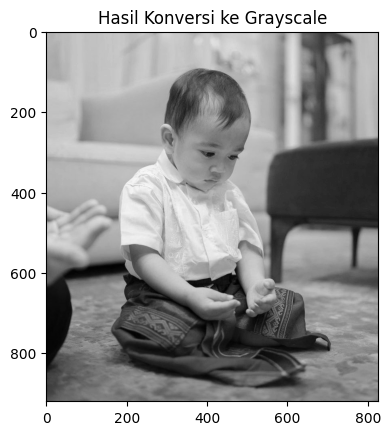

In [2]:
foto = cv2.imread("cipung.jpg") 
# Berfungsi untuk membaca citra dengan nama file "cipung.jpg" dan menyimpannya dalam variabel foto

jumlah_baris = len(foto)
# Berfungsi menghitung jumlah baris citra dan menyimpannya dalam variabel jumlah_baris
jumlah_kolom = len(foto[0])
# Berfungsi menghitung jumlah kolom citra dan menyimpannya dalam variabel jumlah_kolom

blueCH = foto[:,:,0]
# Berfungsi mengekstrak channel biru (blue channel) dari citra dan menyimpannya dalam variabel blueCH
greenCH = foto[:,:,1]
# Berfungsi mengekstrak channel hijau (green channel) dari citra dan menyimpannya dalam variabel greenCH
redCH = foto[:,:,2]
# Berfungsi mengekstrak channel merah (red channel) dari citra dan menyimpannya dalam variabel redCH 

foto_gray = np.zeros((jumlah_baris, jumlah_kolom))
# berfungsi membuat matriks nol berukuran jumlah_baris x jumlah_kolom dan menyimpannya dalam variabel foto_gray

for baris in range(len(foto)):
    for kolom in range(len(foto[0])):
# Perulangan yang berfungsi untuk mengakses setiap piksel dari citra
        foto_gray[baris, kolom] = 0.299*redCH[baris, kolom]+ 0.587*greenCH[baris,kolom]+0.114*blueCH[baris,kolom]
        # Berfungsi menghitung nilai intensitas piksel citra grayscale menggunakan formula yang diberikan 
        # dan menyimpannya dalam matriks foto_gray

foto_gray = foto_gray.astype(np.uint8)
# Berfungsi mengubah tipe data matriks foto_gray menjadi unsigned integer 8-bit, dikarenakan hasil dari 
# konversi grayscale terdapat nilai unsign integer yang mana tidak dapat ditampilkan menjadi foto

print("Matriks")
print(foto_gray)
# berfungsi untuk mencetak matriks dari hasil konversi grayscale

plt.imshow(foto_gray, cmap = 'gray')
# berfungsi untuk msenampilkan citra grayscale dengan menggunakan colormap 'gray'
plt.title("Hasil Konversi ke Grayscale")
plt.show()
# menampilkan hasil citra grayscale

##### #3 Menampilkan Histogram Citra Berdasarkan Level Keabuan dan Jumlah Pixelnya

<function matplotlib.pyplot.show(close=None, block=None)>

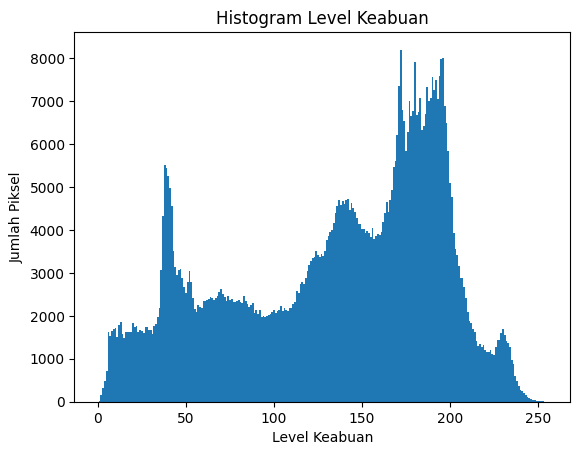

In [3]:
hist = cv2.calcHist([foto_gray],[0],None,[256],[0,256])
# Berfungsi untuk menghitung histogram level keabuan pada citra grayscale dan menyimpannya 
# dalam variabel hist. foto_gray adalah citra grayscale yang akan dihitung histogramnya,
# [0] menunjukkan channel yang akan dihitung (dalam hal ini hanya ada satu channel),
# None menunjukkan tidak ada mask yang digunakan dalam penghitungan histogram, [256] 
# menunjukkan jumlah interval histogram, dan [0,256] menunjukkan rentang nilai intensitas 
# yang akan dihitung
plt.bar(range(256), hist.flatten(), width=1)
#berfungsi untuk Menampilkan histogram level keabuan dalam bentuk bar chart. range(256) 
# menunjukkan nilai intensitas yang akan ditampilkan, hist.flatten() mengubah matriks 
# hist menjadi array satu dimensi, dan width=1 menunjukkan lebar setiap bar pada histogram
plt.title('Histogram Level Keabuan')
# Berfungsi untuk memberi judul pada histogram yang ditampilkan
plt.xlabel('Level Keabuan')
# Berfungsi untuk memberi label pada sumbu x histogram
plt.ylabel('Jumlah Piksel')
# Berfungsi untuk memberi label pada sumbu y histogram
plt.show
# Berfungsi untuk menampilkan histogram level keabuan

##### #4 Menampilkan Histogram Citra Berdasarkan Probabilitas dan Level Keabuannya

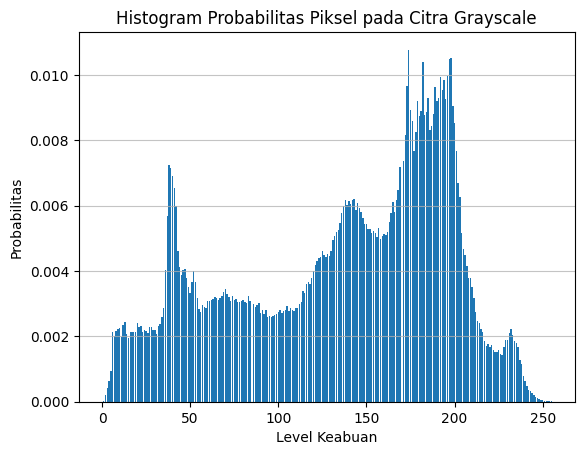

In [4]:

num_pixels = foto_gray.shape[0] * foto_gray.shape[1]
# Berfungsi untuk menghitung jumlah piksel pada citra grayscale dengan mengalikan jumlah baris dan kolom citra
prob_pixels = np.histogram(foto_gray, bins=256)[0] / num_pixels
# Berfungsi untuk menghitung probabilitas kemunculan setiap nilai intensitas pada citra 
# grayscale dan menyimpannya dalam variabel prob_pixels. np.histogram digunakan untuk menghitung 
# histogram citra grayscale dengan 256 interval, dan [0] digunakan untuk mengambil nilai 
# frekuensi kemunculan pada setiap interval. Hasilnya dibagi dengan jumlah piksel untuk 
# mendapatkan probabilitas kemunculan setiap nilai intensitas

plt.bar(range(256), prob_pixels)
# Berfungsi untuk menampilkan histogram probabilitas piksel dalam bentuk bar chart. 
# range(256) menunjukkan nilai intensitas yang akan ditampilkan, dan prob_pixels adalah 
# nilai probabilitas kemunculan setiap nilai intensitas pada citra grayscale

plt.title('Histogram Probabilitas Piksel pada Citra Grayscale')
# Berfungsi untuk memberi judul pada histogram yang ditampilkan
plt.xlabel('Level Keabuan')
# Berfungsi untuk memberi label pada sumbu x histogram
plt.ylabel('Probabilitas')
# Berfungsi untuk memberi label pada sumbu y histogram
plt.grid(axis='y', alpha=0.75)
# Berfungsi untuk menampilkan grid pada sumbu y histogram
plt.show()
# Berfungsi untuk menampilkan histogram probabilitas piksel pada citra grayscale


### Soal 2
#### Lakukanlah konvolusi pada citra dengan zero padding dan tanpa padding dengan kernel berikut
#### ([[0, 0,-1, 1],
####    [0, 2, 1, -1],
####    [-1, 1, 2, 0],
####    [1, -1, 0, 0]])
#### Kemudian tampilkan gambar dan nilai hasil konvolusi tanpa proses clipping, dan dengan proses clipping

##### #1 Melakukan Konvolusi Tanpa Padding pada Citra

[[725. 725. 726. ... 751. 753. 751.]
 [723. 722. 723. ... 752. 753. 752.]
 [718. 718. 722. ... 751. 755. 755.]
 ...
 [325. 327. 330. ... 501. 497. 491.]
 [325. 330. 333. ... 493. 486. 488.]
 [322. 329. 328. ... 487. 484. 480.]]


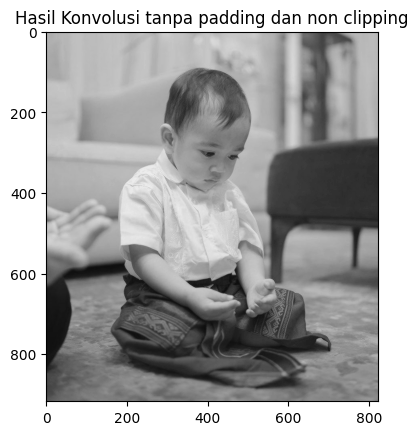

In [5]:
image_rows, image_cols = foto_gray.shape
# Berfungsi untuk mendapatkan ukuran dimensi dari gambar yang akan diproses dan disimpan ke dalam 
# variabel image_rows dan image_cols
kernel = np.array([[0,0,-1,1],[0,2,1,-1],[-1, 1, 2, 0],[1,-1,0,0]])
# Berfungsi untuk menentukan kernel yang akan digunakan pada konvolusi
kernel_rows, kernel_cols = kernel.shape
# Berfungsi untuk mendapatkan ukuran dimensi dari kernel yang akan digunakan dan disimpan ke dalam 
# variabel kernel_rows dan kernel_cols
kon_nopadd = np.zeros((image_rows - kernel_rows + 1, image_cols - kernel_cols + 1))
# Berfungsi untuk membuat array kosong yang akan menampung hasil konvolusi dengan ukuran sesuai dengan 
# ukuran gambar dikurangi dengan ukuran kernel ditambah 1

for i in range(kon_nopadd.shape[0]):
# Berfungsi untuk melakukan iterasi sebanyak ukuran baris dari array kon_nopadd
    for j in range(kon_nopadd.shape[1]):
    # Berfungsi untuk melakukan iterasi sebanyak ukuran kolom dari array kon_nopadd
        kon_nopadd[i][j] = round((foto_gray[i:i + kernel_rows, j:j + kernel_cols] * kernel).sum())
        # Berfungsi Melakukan konvolusi pada area gambar yang sesuai dengan ukuran kernel pada setiap 
        # iterasi menggunakan fungsi sum() dan disimpan di array kon_nopadd pada lokasi yang sesuai dengan indeks i dan j

print(kon_nopadd)

plt.imshow(kon_nopadd, cmap='gray')
# Berfungsi untuk menampilkan hasil konvolusi menggunakan plot dari matplotlib dengan menggunakan grayscale pada colormap
plt.title("Hasil Konvolusi tanpa padding dan non clipping")
# Berfungsi untuk menentukan judul plot yang ditampilkan
plt.show()
# Berfungsi untuk menampilkan plot hasil konvolusi

##### #2 Menampilkan Histogram dari Hasil Konvolusi tanpa Padding dan Non-Clipping

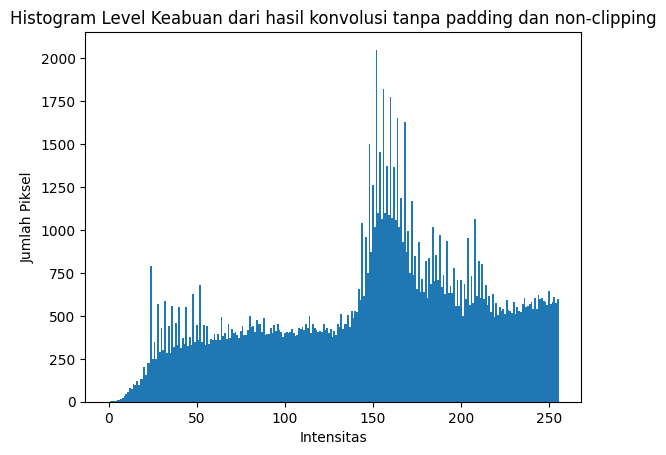

In [6]:
hist = cv2.calcHist([kon_nopadd.astype(np.float32)],[0],None,[256],[0,256])
# Berfungsi untuk menghitung histogram level keabuan dari array kon_nopadd yang telah diubah tipe datanya
# menjadi np.float32 menggunakan fungsi cv2.calcHist(). Hasil histogram disimpan di variabel hist
plt.bar(range(256), hist.flatten(), width=1)
# Berfungsi untuk menampilkan histogram level keabuan menggunakan bar plot dengan sumbu x dari 0 hingga 255, 
# dan sumbu y menunjukkan jumlah piksel dengan intensitas yang sesuai. Lebar setiap bar diatur menggunakan width=1
plt.title('Histogram Level Keabuan dari hasil konvolusi tanpa padding dan non-clipping')
# Berfungsi untuk menentukan judul plot yang ditampilkan
plt.xlabel('Intensitas')
# Berfungsi untuk menentukan label sumbu x pada plot yang menunjukkan intensitas piksel
plt.ylabel('Jumlah Piksel')
# BErfungsi untuk menentukan label sumbu y pada plot yang menunjukkan jumlah piksel dengan intensitas yang sesuai
plt.show()

##### #3 Melakukan Clipping (Normalisasi) pada Hasil Konvolusi tanpa Padding

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


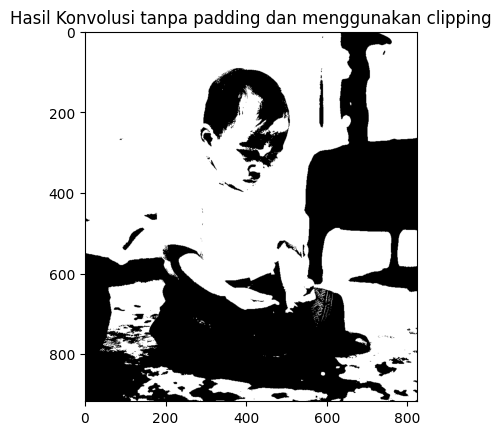

In [7]:
min_val = np.min(kon_nopadd)
# Berfungsi untuk mendapatkan nilai minimum dari seluruh pixel pada gambar hasil konvolusi tanpa padding 
# dan disimpan ke dalam variabel min_val
max_val = np.max(kon_nopadd)
# Berfungsi untuk mendapatkan nilai maksimum dari seluruh pixel pada gambar hasil konvolusi tanpa padding 
# dan disimpan ke dalam variabel max_val
normalized_image = np.round((kon_nopadd - min_val) / (max_val - min_val))
# Berfungsi untuk melakukan normalisasi nilai pixel pada gambar hasil konvolusi dengan padding menggunakan 
# formula (pixel - min_pixel_value) / (max_pixel_value - min_pixel_value). Hasilnya dibulatkan dan disimpan 
# di dalam variabel normalized_image

print(normalized_image)
# Berfungsi untuk menampilkan array dari gambar hasil konvolusi dengan padding yang sudah dinormalisasi

plt.imshow(normalized_image, cmap='gray')
# Berfungsi untuk menampilkan gambar hasil konvolusi dengan padding yang sudah dinormalisasi menggunakan 
# plot dari matplotlib dengan menggunakan grayscale pada colormap
plt.title("Hasil Konvolusi tanpa padding dan menggunakan clipping")
# Berfungsi untuk menentukan judul plot yang ditampilkan
plt.show()

##### #4 Menampilkan Histogram Hasil Clipping dari Konvolusi Tanpa Padding

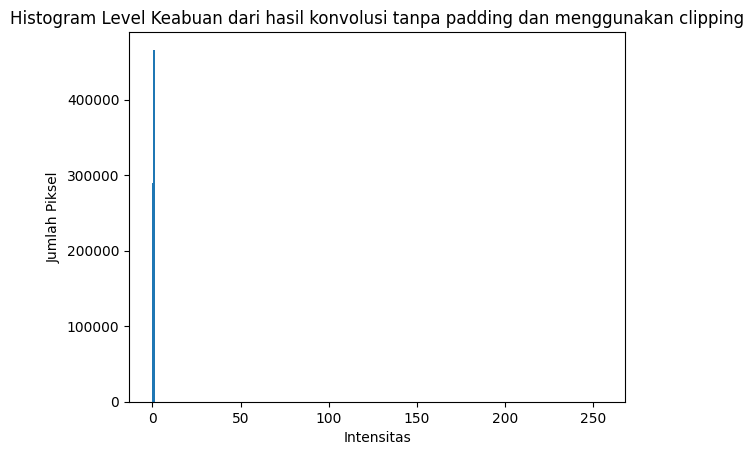

In [8]:
hist = cv2.calcHist([normalized_image.astype(np.float32)],[0],None,[256],[0,256])
# Berfungsi untuk menghitung histogram level keabuan dari array normalized_image yang telah diubah tipe datanya 
# menjadi np.float32 menggunakan fungsi cv2.calcHist(). Hasil histogram disimpan di variabel hist
plt.bar(range(256), hist.flatten(), width=1)
# Berfungsi untuk menampilkan histogram level keabuan menggunakan bar plot dengan sumbu x dari 0 hingga 255, dan 
# sumbu y menunjukkan jumlah piksel dengan intensitas yang sesuai. Lebar setiap bar diatur menggunakan width=1
plt.title('Histogram Level Keabuan dari hasil konvolusi tanpa padding dan menggunakan clipping')
# Berfungsi untuk menentukan judul plot yang ditampilkan
plt.xlabel('Intensitas')
# Berfungsi untuk menentukan label sumbu x pada plot yang menunjukkan intensitas piksel
plt.ylabel('Jumlah Piksel')
# Berfungsi untuk menentukan label sumbu y pada plot yang menunjukkan jumlah piksel dengan intensitas yang sesuai
plt.show()

##### #5 Melakukan Konvolusi Zero Padding pada Citra

[[725. 728. 732. ... 749. 931. 372.]
 [724. 725. 725. ... 751. 749. 372.]
 [723. 723. 722. ... 752. 751. 374.]
 ...
 [317. 322. 329. ... 480. 480. 243.]
 [392. 319. 327. ... 468. 468. 237.]
 [157. 157. 160. ... 235. 231. 232.]]


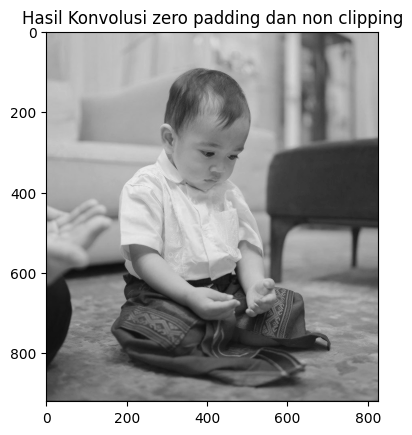

In [9]:
image_rows, image_cols = foto_gray.shape
# Berfungsi untuk mengambil ukuran baris dan kolom dari gambar grayscale yang telah dimuat dan disimpan pada variabel foto_gray
kernel_rows, kernel_cols = kernel.shape
# Berfungsi untuk mengambil ukuran baris dan kolom dari kernel yang telah dimuat dan disimpan pada variabel kernel

padding_size = int((kernel_rows - 1) / 2)
# Berfungsi untuk menghitung ukuran padding yang dibutuhkan pada setiap sisi gambar dengan rumus padding_size = (kernel_rows - 1) / 2 
# dan membulatkan hasilnya ke integer menggunakan int()

padded_image = np.pad(foto_gray, pad_width=((padding_size, padding_size+1), (padding_size, padding_size+1)), mode='constant')
# Berfungsi untuk melakukan padding pada gambar grayscale foto_gray dengan ukuran padding yang telah dihitung sebelumnya 
# menggunakan np.pad() dengan mode konstan
kon_zeropad = np.zeros((image_rows, image_cols))
# Berfungsi untuk membuat matriks nol dengan ukuran yang sama dengan gambar grayscale foto_gray untuk menampung hasil
# konvolusi dengan metode zero padding

for i in range(kon_zeropad.shape[0]):
    for j in range(kon_zeropad.shape[1]):
# Berfungsi untuk melakukan iterasi pada setiap elemen pada matriks kon_zeropad
        kon_zeropad[i][j] = np.round((padded_image[i:i + kernel_rows, j:j + kernel_cols] * kernel).sum())
        # Berfungsi untuk melakukan konvolusi pada setiap elemen matriks kon_zeropad dengan mengambil nilai piksel 
        # dari gambar grayscale yang sudah dipadding dan memperhitungkan bobot kernel pada setiap piksel menggunakan 
        # rumus konvolusi. Hasil konvolusi yang sudah dihitung dibulatkan ke integer terdekat menggunakan np.round()

print (kon_zeropad)
# Berfungsi untuk menampilkan matriks kon_zeropad yang berisi hasil konvolusi menggunakan metode zero 
# padding pada gambar grayscale

plt.imshow(kon_zeropad, cmap='gray')
# Berfungsi msenampilkan gambar hasil konvolusi dengan menggunakan plt.imshow()
plt.title("Hasil Konvolusi zero padding dan non clipping")
# Berfungsi untuk menentukan judul plot yang akan ditampilkan
plt.show()

##### #6 Menampilkan Histogram hasil Konvolusi Zero Padding pada Citra tanpa Clipping

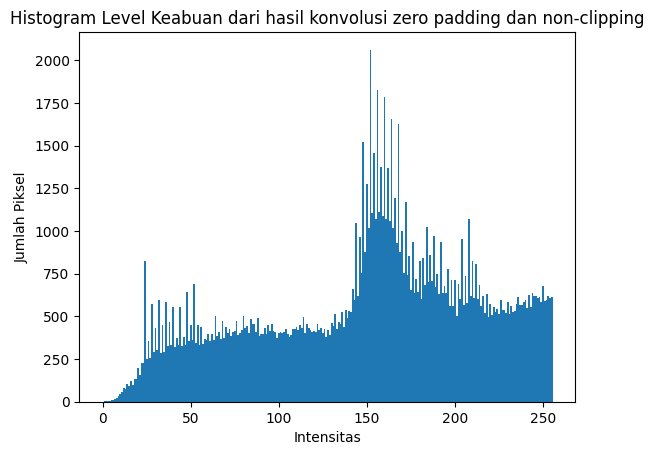

In [10]:
hist = cv2.calcHist([kon_zeropad.astype(np.float32)],[0],None,[256],[0,256])
# Berfungsi untuk menghitung histogram level keabuan dari array kon_zeropad yang telah diubah tipe datanya 
# menjadi np.float32 menggunakan fungsi cv2.calcHist(). Hasil histogram disimpan di variabel hist
plt.bar(range(256), hist.flatten(), width=1)
# Berfungsi untuk menampilkan histogram level keabuan menggunakan bar plot dengan sumbu x dari 0 hingga 255, dan 
# sumbu y menunjukkan jumlah piksel dengan intensitas yang sesuai. Lebar setiap bar diatur menggunakan width=1
plt.title('Histogram Level Keabuan dari hasil konvolusi zero padding dan non-clipping')
# Berfungsi untuk menentukan judul plot yang ditampilkan
plt.xlabel('Intensitas')
# Berfungsi untuk menentukan label sumbu x pada plot yang menunjukkan intensitas piksel
plt.ylabel('Jumlah Piksel')
# Berfungsi untuk menentukan label sumbu y pada plot yang menunjukkan jumlah piksel dengan intensitas yang sesuai
plt.show()

#### #7 Melakukan Clipping (Normalisasi) Pada hasil Konvolusi Zero Padding

[[1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


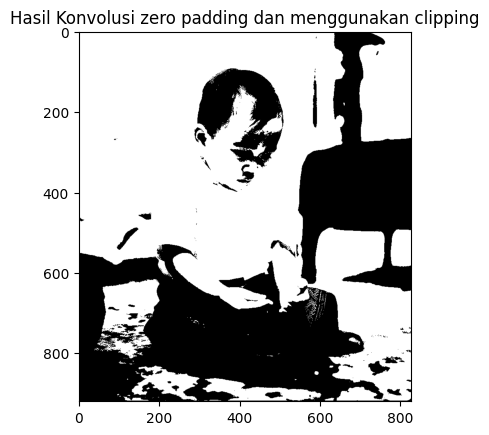

In [11]:
min_val = np.min(kon_zeropad)
# Berfungsi untuk mendapatkan nilai minimum dari seluruh pixel pada gambar hasil konvolusi zero padding 
# dan disimpan ke dalam variabel min_val
max_val = np.max(kon_zeropad)
# Berfungsi untuk mendapatkan nilai maksimum dari seluruh pixel pada gambar hasil konvolusi zero padding 
# dan disimpan ke dalam variabel max_val
normalized_image = np.round((kon_zeropad - min_val) / (max_val - min_val))
# Berfungsi untuk melakukan normalisasi nilai pixel pada gambar hasil konvolusi zero padding menggunakan 
# formula (pixel - min_pixel_value) / (max_pixel_value - min_pixel_value). Hasilnya dibulatkan dan disimpan 
# di dalam variabel normalized_image

print(normalized_image)
# Berfungsi untuk menampilkan array dari gambar hasil konvolusi zero padding yang sudah dinormalisasi

plt.imshow(normalized_image, cmap='gray')
# Berfungsi untuk menampilkan gambar hasil konvolusi zero padding yang sudah dinormalisasi menggunakan 
# plot dari matplotlib dengan menggunakan grayscale pada colormap
plt.title("Hasil Konvolusi zero padding dan menggunakan clipping")
# Berfungsi untuk menentukan judul plot yang ditampilkan
plt.show()

##### #8 Menampilkan Histogram Hasil Clipping dari Konvolusi Zero Padding

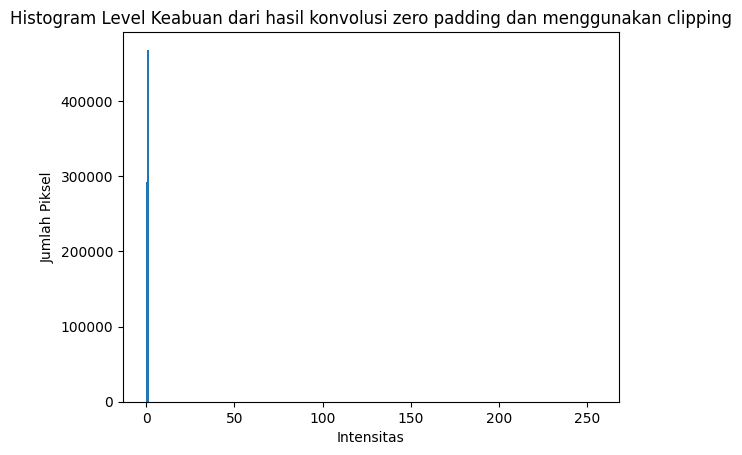

In [12]:
hist = cv2.calcHist([normalized_image.astype(np.float32)],[0],None,[256],[0,256])
# Berfungsi untuk menghitung histogram level keabuan dari array normalized_image yang telah diubah tipe datanya 
# menjadi np.float32 menggunakan fungsi cv2.calcHist(). Hasil histogram disimpan di variabel hist
plt.bar(range(256), hist.flatten(), width=1)
# Berfungsi untuk menampilkan histogram level keabuan menggunakan bar plot dengan sumbu x dari 0 hingga 255, dan 
# sumbu y menunjukkan jumlah piksel dengan intensitas yang sesuai. Lebar setiap bar diatur menggunakan width=1
plt.title('Histogram Level Keabuan dari hasil konvolusi zero padding dan menggunakan clipping')
# Berfungsi untuk menentukan judul plot yang ditampilkan
plt.xlabel('Intensitas')
# Berfungsi untuk menentukan label sumbu x pada plot yang menunjukkan intensitas pikse
plt.ylabel('Jumlah Piksel')
# Berfungsi untuk menentukan label sumbu y pada plot yang menunjukkan jumlah piksel dengan intensitas yang sesuai
plt.show()